# SVM(SVR) -Salary Baltimore Prediction

STEPS
1. Importing the libraries
2. Importing the dataset
3. Data Cleaning, Data Exploration, Dta Manipulation, Data Visualization
4. EDA- Exploratory Data Analysis
5. Splitting the Dataset
6. Choosing the model
7. Training the model
8. Testing the model
9. Model Evaluation
10. [OPTIONAL] Export the dataset into the .csv

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Problem Statement
Given a dataset, it has salary from July 1, 2013 to June 30, 2014. Predict the salary of employees working in Baltimore

#Importing Dataset


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv')

In [ ]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


#Data Exploration


In [ ]:
#See, the attribute- name does not have impact on salary

In [ ]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [ ]:
df.shape

(18981, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [ ]:
#All datatypes are objects,
#min, max, std can be found on int or float dtype only, so need to chage dtype

In [ ]:
#         Name
#unique	18788
#means, there are people who share same names

In [ ]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
#CLEAN-1
#' Name',--->there is a space in front of this column name, clean it
#remove the space and change to lower case for all column names

In [ ]:
newdf=df.copy()

In [ ]:
newdf.columns=newdf.columns.str.strip().str.lower()

In [ ]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [ ]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
#check for null values
newdf.isnull().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [ ]:
#CLEAN-2
#Delete the column grosspay
newdf.drop('grosspay',axis=1, inplace=True)


In [ ]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

* value_counts()

In [ ]:
#CLEAN-3
#Agency ID, get unique agency ID, and check how many times each ID occured
newdf.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18976    W02235
18977    W02629
18978    A99416
18979    A99262
18980    A50206
Name: agencyid, Length: 18981, dtype: object

In [ ]:
newdf.agencyid.unique()

array(['W02200', 'A03031', 'A29005', ..., 'W02674', 'W02382', 'W02339'],
      dtype=object)

In [ ]:
newdf.agencyid.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: agencyid, Length: 1177, dtype: int64

In [ ]:
#Insight
#P04001    316
#C90786    276
#W02629    193
#in these agency--many employee came


In [ ]:
#CLEAN-3
#Get agency name of respective agency id
#there is a seperate column for agency name
##Agency ID, get unique agency ID, and check how many times each ID occured->do it for agency name

In [ ]:
newdf.agency.value_counts()

Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: agency, Length: 65, dtype: int64

* map()

In [ ]:
#CLEAN-4
#map the name of the agency with the agency id

In [ ]:
#try1
#ag=pd.DataFrame({'Agency_ID' :newdf.agencyid.value_counts(), 'Agency_name': newdf.agency.value_counts()}, ignore_index=True)

In [ ]:
#try2
#ag1=pd.DataFrame()
#ag1['Agency_name']= newdf.agency.value_counts()
#ag1['Agency_ID']= newdf.agencyid.value_counts()
#ag1

In [ ]:
#try3
newdf.agencyid.value_counts().map(newdf.agency)

P04001    HLTH-Health Department 
C90786             Youth Summer  
W02629         Police Department 
P04002           DPW-Solid Waste 
A99416             Youth Summer  
                   ...           
W02539        OED-Employment Dev 
A65052        OED-Employment Dev 
W02106        OED-Employment Dev 
W02590        OED-Employment Dev 
W02339        OED-Employment Dev 
Name: agencyid, Length: 1177, dtype: object

In [ ]:
#check
newdf[newdf['agencyid']=='W02539']['agency']

1194    Youth Summer  
Name: agency, dtype: object

In [ ]:
#W02099 is Youth Summer
# but in mapping, it shows W02539        OED-Employment Dev
#try3-falis
#

In [ ]:
#try4
newdf.agencyid.value_counts().map(newdf.agency.value_counts())

P04001   NaN
C90786   NaN
W02629   NaN
P04002   NaN
A99416   NaN
          ..
W02539   NaN
A65052   NaN
W02106   NaN
W02590   NaN
W02339   NaN
Name: agencyid, Length: 1177, dtype: float64

In [ ]:
#try5-success
# Get unique values of 'agencyid' with count
agencyid_counts = newdf['agencyid'].value_counts()

# Get unique values of 'agency'
unique_agencies = newdf['agency'].unique()

# Create DataFrame with counts and agencies
result_df = pd.DataFrame({
    'AgencyID': agencyid_counts.index,
    'Count': agencyid_counts.values
})

# Map 'AgencyID' to 'Agency'
result_df['Agency'] = result_df['AgencyID'].map(newdf.groupby('agencyid')['agency'].first())

# Print the result
print(result_df[['AgencyID', 'Count', 'Agency']])


     AgencyID  Count                   Agency
0      P04001    316  R&P-Recreation (part-ti
1      C90786    276   TRANS-Crossing Guards 
2      W02629    193            Youth Summer 
3      P04002    191  R&P-Recreation (part-ti
4      A99416    166       Police Department 
...       ...    ...                      ...
1172   W02539      1           Youth Summer  
1173   A65052      1  HLTH-Health Department 
1174   W02106      1           Youth Summer  
1175   W02590      1           Youth Summer  
1176   W02339      1           Youth Summer  

[1177 rows x 3 columns]


In [ ]:
#CLEAN-4
#jobtitle, jobsalary
newdf.jobtitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: jobtitle, Length: 1075, dtype: int64

In [ ]:
newdf.annualsalary.value_counts()

$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$116300.00       1
$83500.00        1
$40994.00        1
$42846.00        1
$900.00          1
Name: annualsalary, Length: 1590, dtype: int64

In [ ]:
# annualsalary column, clean--> remove all dollar sigh, convert to integer
newdf['annualsalary']=newdf['annualsalary'].str.replace('$',"")

<ipython-input-58-8ede44dcc43f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  newdf['annualsalary']=newdf['annualsalary'].str.replace('$',"")


In [ ]:
newdf['annualsalary']

0        11310.00
1        53428.00
2        68300.00
3        62000.00
4        43999.00
           ...   
18976    11310.00
18977    11310.00
18978    43999.00
18979    44104.00
18980    53568.00
Name: annualsalary, Length: 18981, dtype: object

In [ ]:
# reference df['AgencyID'] = df['AgencyID'].astype(int)
#try1
#newdf['annualsalary'] = df['annualsalary'].astype(int)
dumm=newdf.copy()


In [ ]:
#try2- success
newdf['annualsalary'] = newdf['annualsalary'].astype(float)

In [ ]:
dumm=newdf.copy()

In [ ]:
#cant covert to int
#for i in range(0, len(dumm['annualsalary'])):
#  dumm['annualsalary'][i]=float(dumm['annualsalary'][i])

In [ ]:
#can convert to float
for i in range(0, len(dumm['annualsalary'])):
  dumm['annualsalary'][i]=float(dumm['annualsalary'][i])

<ipython-input-69-b958dc9551df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dumm['annualsalary'][i]=float(dumm['annualsalary'][i])


In [ ]:
dumm.annualsalary

0        11310.0
1        53428.0
2        68300.0
3        62000.0
4        43999.0
          ...   
18976    11310.0
18977    11310.0
18978    43999.0
18979    44104.0
18980    53568.0
Name: annualsalary, Length: 18981, dtype: float64

In [ ]:
#got it

In [ ]:
#one line code
#newdf['annualsalary'] = newdf['annualsalary'].str.strip('$').astype(float)

In [ ]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [ ]:
#CLEAN-5
#condition 1:hiredate is in date--> need: hireday, hiremonth, hireyear(int)
#condition 2:the 3 columns should be there in the POS where hiredate column was there
#(i.e.) before:  columns----->name	jobtitle	agencyid	agency	hiredate	annualsalary
#after:------------>name	jobtitle	agencyid	agency	**hireday, hiremonth, hireyear**	annualsalary

In [ ]:
 #try1
 #hireday, hiremonth, hireyear = newdf['hiredate'].str.split('/') if not null

In [ ]:
#try2
#newdf[['hireday', 'hiremonth', 'hireyear']]=newdf['hiredate'].str.split('/')

In [ ]:
# Convert 'hiredate' to datetime
newdf['hiredate'] = pd.to_datetime(newdf['hiredate'], errors='coerce')

# Extract 'hireday', 'hiremonth', and 'hireyear'
newdf['hireday'] = newdf['hiredate'].dt.day
newdf['hiremonth'] = newdf['hiredate'].dt.month
newdf['hireyear'] = newdf['hiredate'].dt.year

# Rearrange columns
newdf = newdf[['name', 'jobtitle', 'agencyid', 'agency', 'hireday', 'hiremonth', 'hireyear', 'annualsalary']]


In [ ]:
newdf.head()

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10.0,6.0,2013.0,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24.0,10.0,1979.0,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25.0,9.0,2006.0,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23.0,7.0,2009.0,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24.0,7.0,2013.0,43999.0


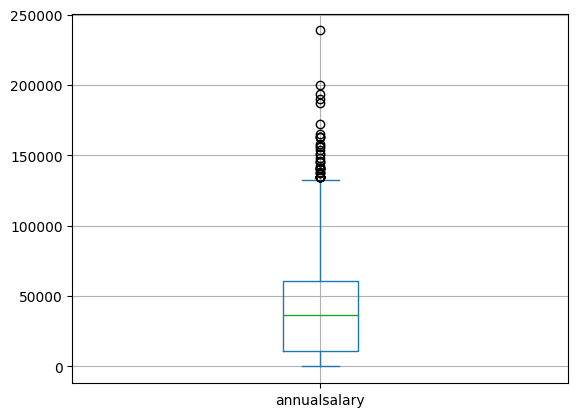

In [ ]:
#Plot a Boxplot for annualsalary column
newdf.annualsalary.plot.box()
plt.grid()

In [ ]:
#insight
#There are more outliers

In [ ]:
#Plot top 10 jobs based on the hiring
# Get unique jobtitles with counts in descending order
jobtitle_counts = newdf['jobtitle'].value_counts()


In [ ]:
jobtitle_counts

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: jobtitle, Length: 1075, dtype: int64

In [ ]:
jobtitle_counts = newdf['jobtitle'].value_counts().reset_index()

In [ ]:
jobtitle_counts

,index,jobtitle
0,AIDE BLUE CHIP,4817
1,POLICE OFFICER,1866
2,LABORER (Hourly),597
3,EMT Firefighter Suppression,358
4,CROSSING GUARD,337
...,...,...
1070,VEHICLE DAMAGE INVESTIGATOR,1
1071,Community Health Nurse I,1
1072,ACCOUNTING SYSTEMS ANALYST,1
1073,DESK TOP PUBLISHING COORDINATO,1


In [ ]:
jobtitle_counts.columns = ['jobtitle', 'count']


In [ ]:
jobtitle_counts

,jobtitle,count
0,AIDE BLUE CHIP,4817
1,POLICE OFFICER,1866
2,LABORER (Hourly),597
3,EMT Firefighter Suppression,358
4,CROSSING GUARD,337
...,...,...
1070,VEHICLE DAMAGE INVESTIGATOR,1
1071,Community Health Nurse I,1
1072,ACCOUNTING SYSTEMS ANALYST,1
1073,DESK TOP PUBLISHING COORDINATO,1


In [ ]:
jobtitle_counts = jobtitle_counts.sort_values(by='count', ascending=False)

print(jobtitle_counts)

                            jobtitle  count
0                     AIDE BLUE CHIP   4817
1                     POLICE OFFICER   1866
2                   LABORER (Hourly)    597
3        EMT Firefighter Suppression    358
4                     CROSSING GUARD    337
...                              ...    ...
805   LIQUOUR BOARD ASST EXE SECRETA      1
804                     HRIS Analyst      1
803               PARK ADMINISTRATOR      1
802   DEPUTY DIRECTOR MEDICAL SERVIC      1
1074             Research Analyst II      1

[1075 rows x 2 columns]


In [ ]:
jobtitle_counts['jobtitle'][:11]

0                  AIDE BLUE CHIP
1                  POLICE OFFICER
2                LABORER (Hourly)
3     EMT Firefighter Suppression
4                  CROSSING GUARD
5                  COMMUNITY AIDE
6      RECREATION ARTS INSTRUCTOR
7            POLICE OFFICER (EID)
8                 POLICE SERGEANT
9          MOTOR VEHICLE DRIVER I
10           OFFICE ASSISTANT III
Name: jobtitle, dtype: object

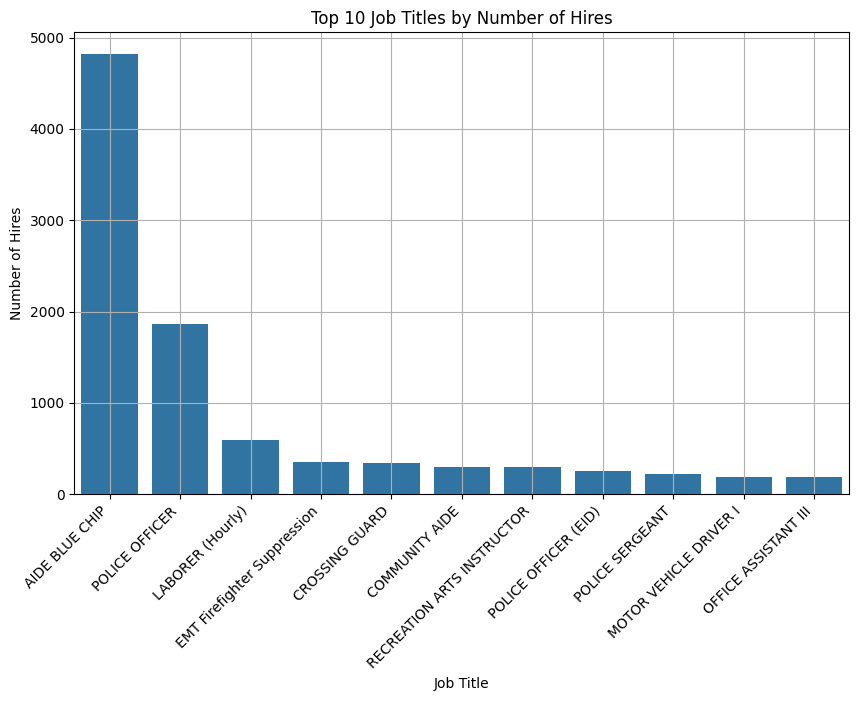

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='jobtitle', y='count', data=jobtitle_counts[:11])
plt.xlabel('Job Title')
plt.ylabel('Number of Hires')
plt.title('Top 10 Job Titles by Number of Hires')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()
#to get horizontal graph, use x as y and y as x

<Axes: xlabel='jobtitle'>

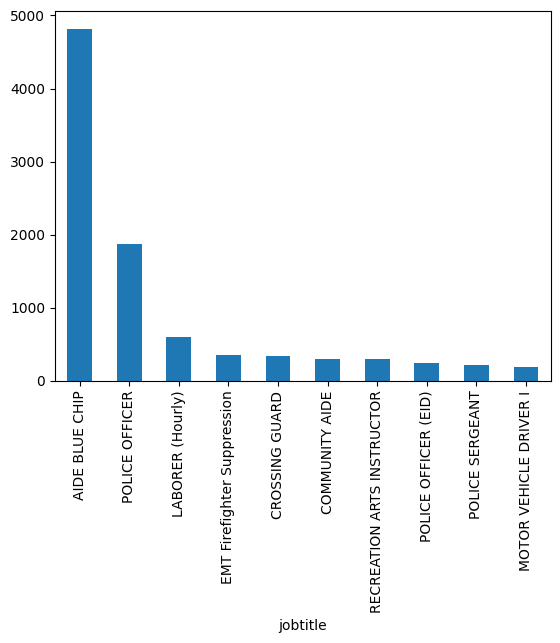

In [ ]:
#try2-class
newdf.groupby(['jobtitle'])['name'].count().sort_values(ascending=False).head(10).plot.bar()


<ipython-input-121-212b51dcba20>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='annualsalary', y='jobtitle', data=avg_salary_by_jobtitle[:11], palette='viridis')


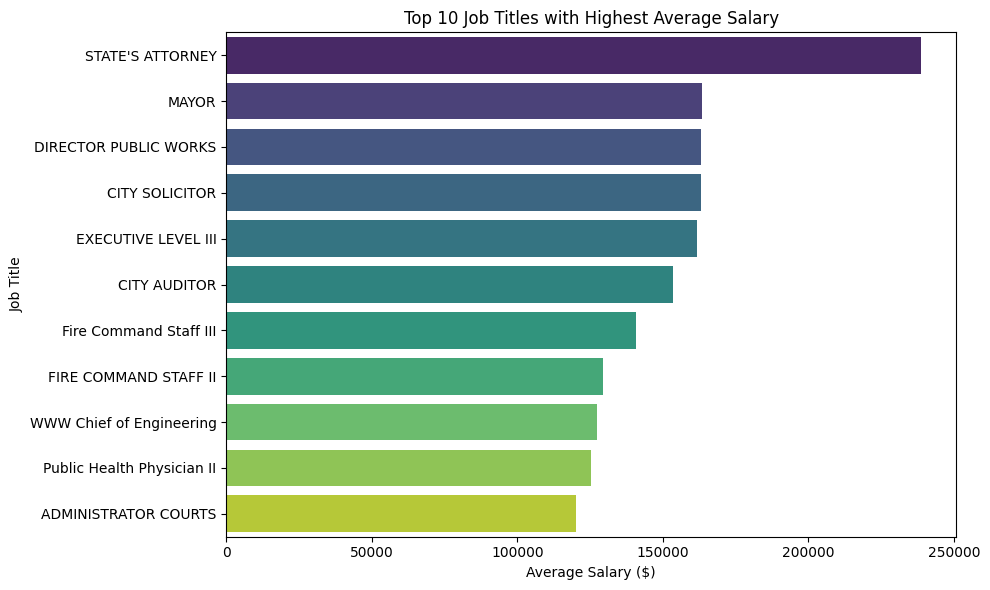

In [ ]:

# Remove rows with missing salary values
df = newdf.dropna(subset=['annualsalary'])

# Convert 'annualsalary' to numeric
#df['annualsalary'] = pd.to_numeric(df['annualsalary'].replace('[\$,]', '', regex=True))

# Calculate average salary for each jobtitle
avg_salary_by_jobtitle = df.groupby('jobtitle')['annualsalary'].mean().sort_values(ascending=False).reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='annualsalary', y='jobtitle', data=avg_salary_by_jobtitle[:11], palette='viridis')
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles with Highest Average Salary')
plt.tight_layout()
plt.show()


[Text(0.5, 0, 'Number of Employees'),
 Text(0, 0.5, 'Agency ID'),
 Text(0.5, 1.0, 'Top 10 Agency IDs with Highest Number of Employees')]

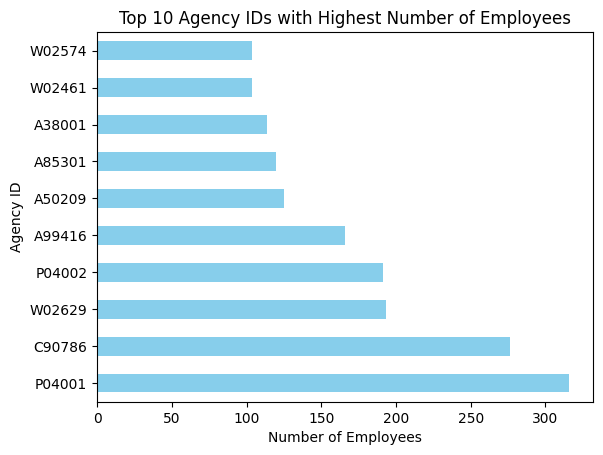

In [ ]:
#Plot Top 10 Agency's ID that has highest no of employess
newdf['agencyid'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue').set(xlabel='Number of Employees', ylabel='Agency ID', title='Top 10 Agency IDs with Highest Number of Employees')


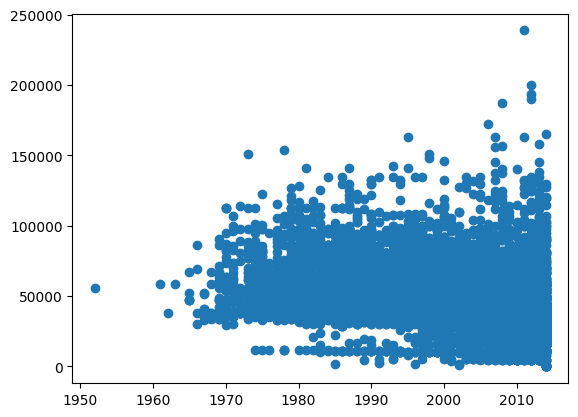

In [ ]:
#plot salary VS year
plt.scatter(newdf['hireyear'],newdf['annualsalary'])

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Highest Salary'),
 Text(0.5, 1.0, 'Highest Salary for Each Year')]

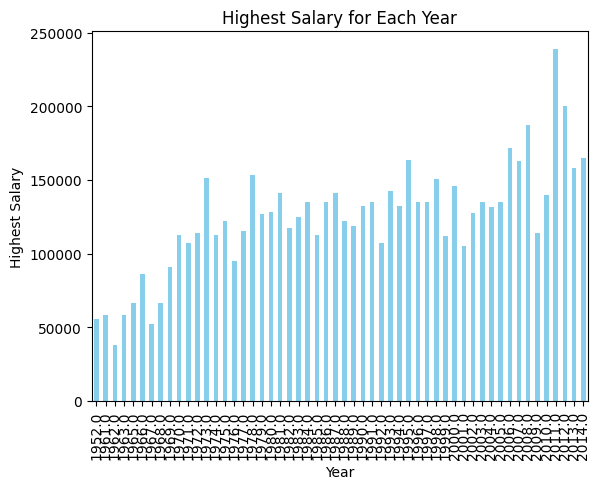

In [ ]:
#highest salary VS year
newdf.groupby('hireyear')['annualsalary'].max().plot(kind='bar', color='skyblue').set(xlabel='Year', ylabel='Highest Salary', title='Highest Salary for Each Year')


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Highest Salary'),
 Text(0.5, 1.0, 'Highest Salary for Each Year')]

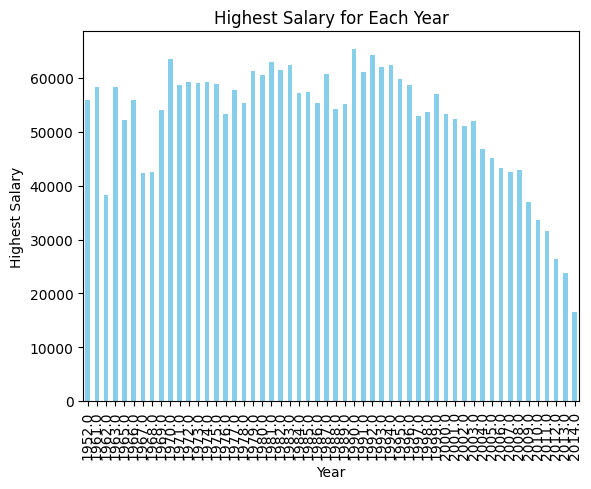

In [ ]:
#average salary VS year
newdf.groupby('hireyear')['annualsalary'].mean().plot(kind='bar', color='skyblue').set(xlabel='Year', ylabel='Highest Salary', title='Highest Salary for Each Year')


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of Hires'),
 Text(0.5, 1.0, 'Number of Hires by Month')]

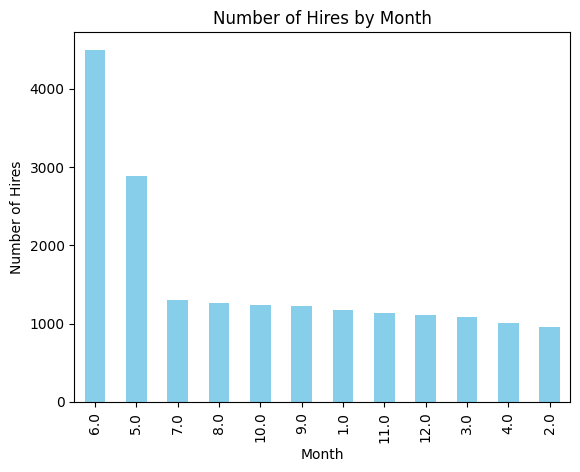

In [ ]:
#month in which most of the people are hired
newdf['hiremonth'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue').set(xlabel='Month', ylabel='Number of Hires', title='Number of Hires by Month')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


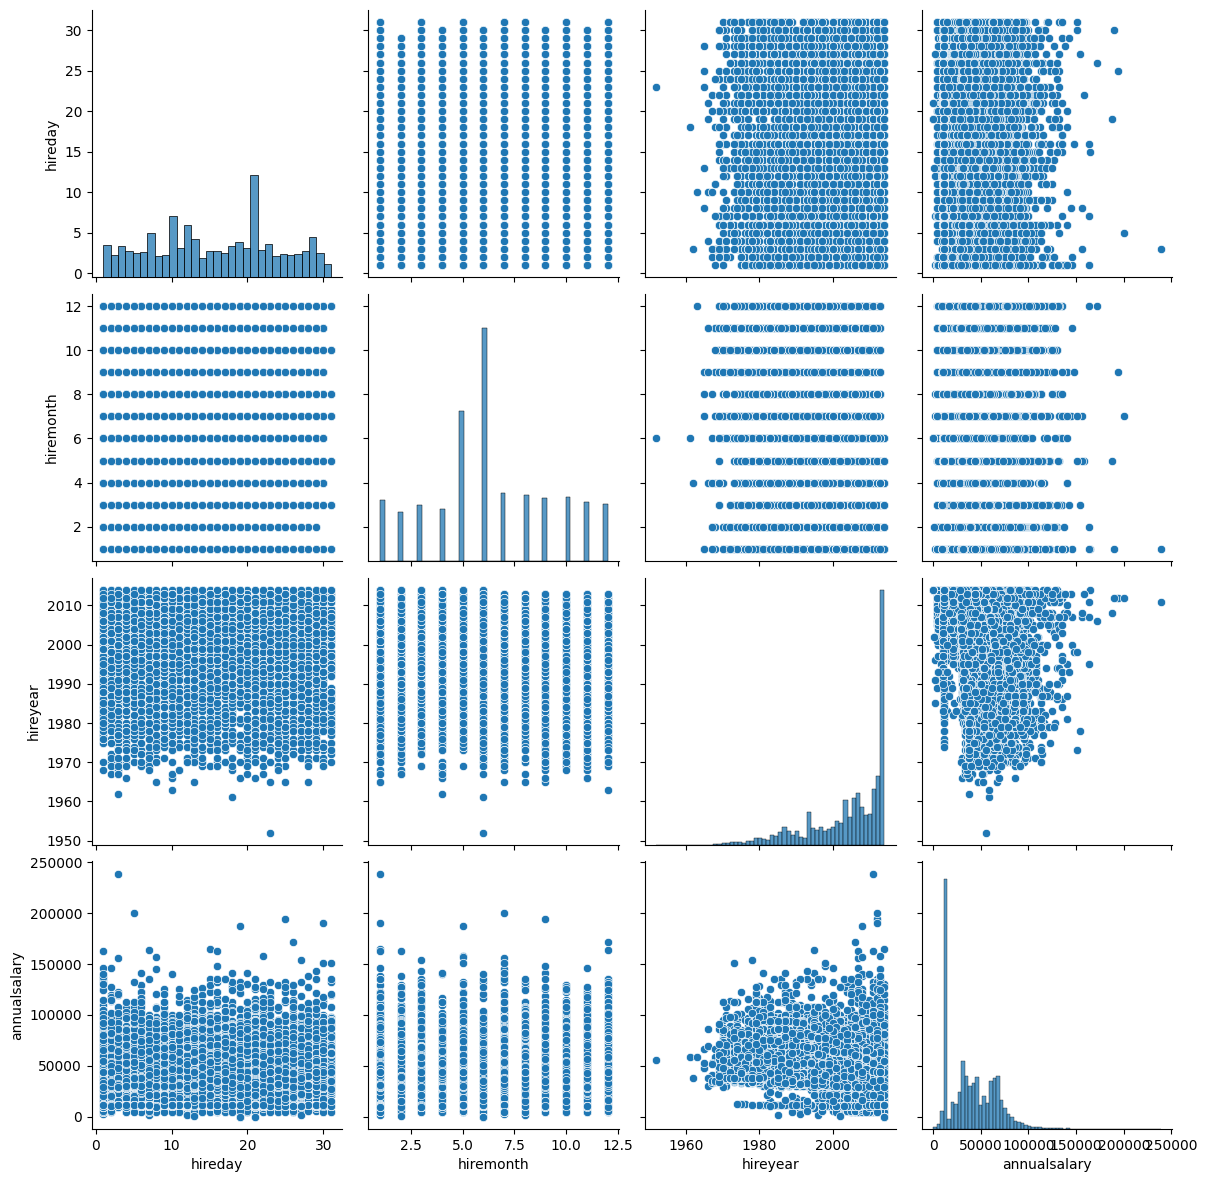

In [ ]:
#plot a pairplot
sns.pairplot(newdf, size=3)

<ipython-input-133-7570019f7ecf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newdf.corr(), annot=True, cmap='viridis')


<Axes: >

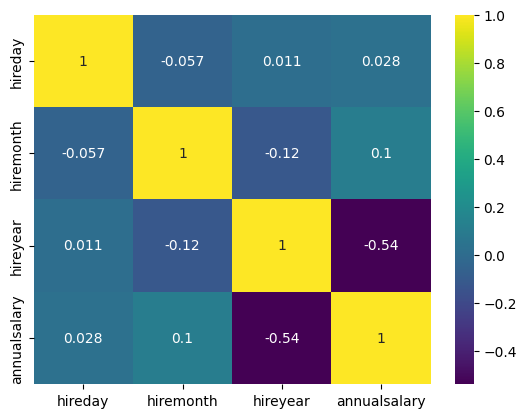

In [ ]:
#plot a heatmap
sns.heatmap(newdf.corr(), annot=True, cmap='viridis')


# MACHINE LEARNING

* Train Test split

* Data preprocessing - Feature Scaling(Standardization)

*  Choose model

* Train/fit

* Test/Predict

* Performance


* Conclusion
I the employee joins on the following date:
02/09/2018, 04/04/2015,21/12/2021, predict the salary